### Imports

In [2]:
import pandas as pd

import glob

import numpy as np

import tqdm

In [28]:
def seperate_equilibria_and_non(df):
    """A functions that takes a dataframe with points and seperates the
    points are Nash and those that are not.
    
    Returns two dataframes."""
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)].drop_duplicates('ID'), df[df['ID'].isin(noneq_players_ID)].drop_duplicates('ID')

In [29]:
def N0(p):
    """The right hand side of the condition:
    pi(AllD, p) - (b - c) <= 0
    
    for b=2 and c=1."""
    return 2 * p[3] - 1

def N13107(p):
    """The right hand side of the condition:
    pi(Alternator, p) - (b - c) <= 0
    
    for b=2 and c=1."""
    return p[1] + p[2] -  3 / 2

def N0_high_benefit(p):
    """The right hand side of the condition:
    pi(AllD, p) - (b - c) <= 0
    
    for b=7 and c=1."""
    return 7 * p[3] - 6

def N13107_high_benefit(p):
    """The right hand side of the condition:
    pi(Alternator, p) - (b - c) <= 0
    
    for b=7 and c=1."""
    return (7 * p[1] + 7 * p[2] -  13) / 2

For the case of two-bit reactive strategies we tested in $10 ^ 4$ points where Nash. Instead of reading in all the results at the same time, we read them in batches of 1000.

In [30]:
files = glob.glob("../data/big_data/*.csv")

indices_to_read = np.arange(0, len(files), 1000)

In [ ]:
# to save the points which are Nash and export them for plotting
eqs = []

for i, start in tqdm.tqdm_notebook(enumerate(indices_to_read[:-1])):
    
    dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files[start:indices_to_read[i + 1]]]

    df = pd.concat(dfs)
    
    eq, noneq = seperate_equilibria_and_non(df)
    
    # for all points that are nash check that the conditions:
    # pi(AllD, p) - (b - c) <= 0 and pi(Alternator, p) - (b - c) <= 0
    # hold
    for i, row in eq[['p1', 'p2', 'p5', 'p6']].iterrows():
    
        p = row[['p1', 'p2', 'p5', 'p6']]

        A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
        B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    

        assert (A and B)
        
    
    # for all points that are not nash check that the conditions:
    # pi(AllD, p) - (b - c) <= 0 and pi(Alternator, p) - (b - c) <= 0
    # are never true

    ever_true = []
    for i, row in noneq[['p1', 'p2', 'p5', 'p6']].iterrows():

        p = row[['p1', 'p2', 'p5', 'p6']]

        A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
        B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    

        if (A and B):
            ever_true.append(row)

    assert not ever_true # checks that ever_true is empty
    
    eqs.append(eq)

    del dfs

    del df
    
    del eq
    
    del noneq

In [ ]:
equilibria = pd.concat(eqs)

equilibria = equilibria.reset_index()

equilibria.to_csv("../data/equilibria_from_large_search.csv")

In [5]:
pd.read_csv("../data/equilibria_from_large_search.csv").columns

Index(['Unnamed: 0', 'Unnamed: 1', 'ID', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16',
       'label', 'Sp', 'Sq', 'condition A', 'condition B', 'c', 'b'],
      dtype='object')

### High Benefit Case

We can repeat the analysis for the case of high benefit. However, for higher benefit we run the process for $10 ^ 3$ points only.

In [1]:
files = glob.glob("../data/two_bit_against_memory_two_b_7/*csv")

dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

NameError: name 'glob' is not defined

In [ ]:
eq, noneq = seperate_equilibria_and_non(df)
    
for i, row in eq[['p1', 'p2', 'p5', 'p6']].iterrows():

    p = row[['p1', 'p2', 'p5', 'p6']]

    A = np.isclose(N13107_high_benefit(p), 0, atol=10 ** -4) or  N13107_high_benefit(p) < 0
    B = np.isclose(N0_high_benefit(p), 0, atol=10 ** -4) or  N0_high_benefit(p) < 0    

    assert (A and B)


ever_true = []

for i, row in noneq[['p1', 'p2', 'p5', 'p6']].iterrows():

    p = row[['p1', 'p2', 'p5', 'p6']]

    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    

    if (A and B):
        ever_true.append(row)

assert not ever_true

del dfs

del df

del noneq

In [ ]:
eq.to_csv("../data/equilibria_with_high_benefit.csv")

### Strategies to check

We have stated that for a two-bit reactive strategy to be nash, the following conditions must hold:
    
$$\pi(\text{AllD}, p) - (b - c) \leq 0 \text{ and } \pi(\text{Alternator}, p) - (b - c) \leq 0$$

but how did we derive that this pair of strategies constrain the space of nash?

In [31]:
# A data set with 1000 random points when b = 2 

files = glob.glob("data/two_bit_against_memory_two/*csv")

In [32]:
dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

In [34]:
per_player = df.groupby('ID')['condition A'].all()

noneq_players_ID = per_player[per_player == False].index
    
noneq = df[df['ID'].isin(noneq_players_ID)]

In [35]:
noneq['ID'].nunique()

562

We are interested in the points which are no Nash. For each point we have recorded for which pure memory-two strategies the following condition does not hold:

$$ \pi(q, p) \leq (b - c) $$

For each point we construct a set which contains all such strategies. In this example dataset there are 562 points that are not nash, and thus, we have 562 sets.

In [36]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [37]:
len(sets)

562

In [ ]:
The aim is to find the smallest set of strategies such that in this set there are elements for each set.


In [38]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [39]:
max(counter.values())

497

In [ ]:
There is not a signle 

In [190]:
df['ID'].nunique()

1000

In [191]:
eq, noneq = seperate_equilibria_and_non(df)

In [192]:
eq['ID'].nunique(), noneq['ID'].nunique()

(438, 562)

In [19]:
def conditition_one(p2, p4, b, c):
    return p4 < 1 - (c / b)

def conditition_two(p2, p4, b, c):
    return p2 < p4

def conditition_three(p3, b, c):
    return p3 < 1

def condition_four(p2, p4, b, c):
    return  1 + p2 < (b / c) + (p4 * (c - b)) / c

def nash_conditions(p, b, c):
    p1, p2, p3, p4 = p
    
    c1 = conditition_one(p2, p4, b, c)
    c2 = conditition_two(p2, p4, b, c)
    c3 = conditition_three(p3, b, c)
    c4 = condition_four(p2, p4, b, c)
    
    return {"c1": c1, "c2": c2, "c3": c3, "c4": c4}

In [19]:
for i, row in noneq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    check = nash_conditions(p, 2, 1)
    
    assert all(check.values()) == False

In [20]:
outside = 0
for i, row in eq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    check = all(nash_conditions(p, 2, 1).values())
    
    if check == False:
        outside += 1

In [21]:
outside / eq['ID'].nunique()

0.7146118721461188

#### The pure set of strategies we need to check 

In [193]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [194]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [195]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [196]:
[s for s in sets if ('N0' not in s) and ("N13107" not in s)]

[]

In [198]:
len([s for s in sets if ('N0' not in s) and ("N255" not in s)])

45

In [213]:
deterministic_strategies[255]

(0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)

In [199]:
[s for s in sets if ('N0' not in s) and ("N8898" not in s)]

[]

In [3]:
deterministic_strategies = list(
    itertools.product([0, 1], repeat=2 ** (2 * 2))
    )

In [13]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

b, c = sym.symbols("b, c")

player = [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
          p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4]

M = calculate_M_memory_two(deterministic_strategies[0], player, analytical=True)

ss = invariant_distribution_analytically(M)

In [14]:
(ss @ np.array([b - c, -c, b, 0] * 4))[0].subs({p_1:1}).factor()

b*p_4

In [211]:
M = calculate_M_memory_two(deterministic_strategies[13107], player, analytical=True)

ss2 = invariant_distribution_analytically(M)

In [212]:
(ss2 @ np.array([b - c, -c, b, 0] * 4))[0].subs({p_1:1}).factor()

(b*p_2 + b*p_3 - c)/2

In [223]:
# This code will take a long time 

# labels = [f"N{i}" for i in range(0, 16)]

# idx_sets = []

# for i, j, k in list(itertools.combinations(labels, r=3)):
#     index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s) and k not in list(s))]
    
#     if len(index) == 0:
#         idx_sets.append((i, j, k))

Thus, N0 and N13107 are enough to check for Nash.

In [75]:
N0 = [0, 0, 0, 0]
N13107 = [0, 0, 1, 1]

In [76]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

b, c = sym.symbols("b, c")

player = [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
          p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4]

M = calculate_M_memory_two(N0 * 4, player, analytical=True)

ss = invariant_distribution_analytically(M)

In [77]:
ss

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p_4**2, p_4*(1 - p_4), 0, 0, p_4*(1 - p_4), p_4**2 - 2*p_4 + 1]])

In [78]:
exprN0 = ((ss @ np.array([b - c, -c, b, 0] * 4))[0] - (b - c)).factor()
exprN0

b*p_4 - b + c

In [81]:
exprN0.subs({b:2, c:1})

2*p_4 - 1

In [82]:
M = calculate_M_memory_two(N13107 * 4, player, analytical=True)

ss = invariant_distribution_analytically(M)

In [83]:
ss

Matrix([[0, 0, p_2*p_3/2, p_2*(1 - p_3)/2, 0, 0, p_3*(1 - p_2)/2, p_2*p_3/2 - p_2/2 - p_3/2 + 1/2, p_2*p_3/2, p_3*(1 - p_2)/2, 0, 0, p_2*(1 - p_3)/2, p_2*p_3/2 - p_2/2 - p_3/2 + 1/2, 0, 0]])

In [84]:
exprN13107 = ((ss @ np.array([b - c, -c, b, 0] * 4))[0] - (b - c)).factor()
exprN13107

(b*p_2 + b*p_3 - 2*b + c)/2

In [87]:
exprN13107.subs({b:2, c:1})

p_2 + p_3 - 3/2

In [38]:
def N0(p):
    return 2 * p[3] - 1

def N13107(p):
    return p[1] + p[2] -  3 / 2

In [97]:
x = np.arange(0, 1 - 10 ** -5, 0.05)
y = np.arange(0, 1 - 10 ** -5, 0.05)
z = np.arange(0, 1 - 10 ** -5, 0.05)

xv, yv, zv = np.meshgrid(x, y, z)

In [98]:
Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 3))
Is13107, Js13107, Zs13107 = np.where(np.isclose(N13107((1, xv, yv, zv)), 0, atol=10 ** - 3))

### Results on Good Nash - Two bit reactive

In [27]:
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55)]

In [28]:
color = '#FDF6E3'

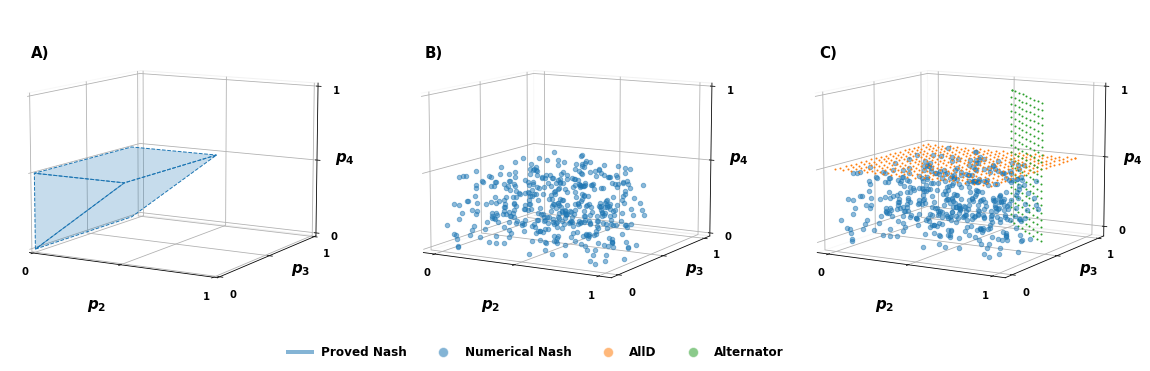

In [102]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:blue', alpha=.25))
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        ax3.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);

    
for k, indices in enumerate([[Is0, Js0, Zs0], 
                             [Is13107, Js13107, Zs13107]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax3.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax3.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
                color=colors[k])
        
for ax in axes:
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax3.legend(custom_lines, ['Proved Nash',
                          'Numerical Nash',
                          'AllD', 'Alternator'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("static/two_bit_reactive_numerical_results.pdf", bbox_inches='tight')

In [238]:
files = glob.glob("data/two_bit_against_memory_two/*.csv")

In [239]:
columns2 = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

In [240]:
dfs = [pd.read_csv(file, index_col=0, names=columns2) for file in files]

In [241]:
df2 = pd.concat(dfs)

In [242]:
df2['ID'].nunique()

1000

In [243]:
eq_memone, noneq_memone = seperate_equilibria_and_non(df2)

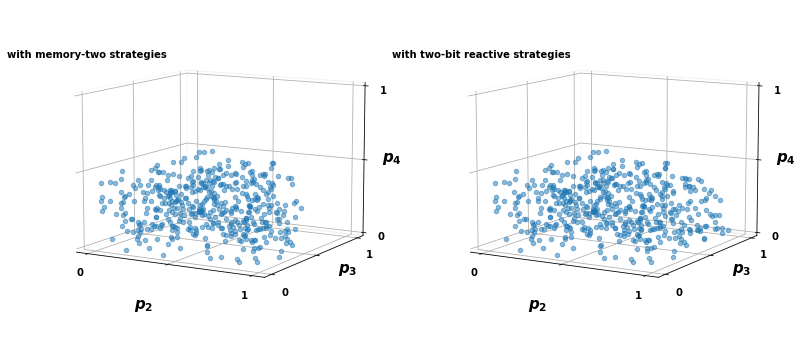

In [248]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("with memory-two strategies", fontweight='bold', x=.1, y=.9, fontsize=10)

ax2.set_title("with two-bit reactive strategies", fontweight='bold', x=.1, y=.9, fontsize=10)


plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/five.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

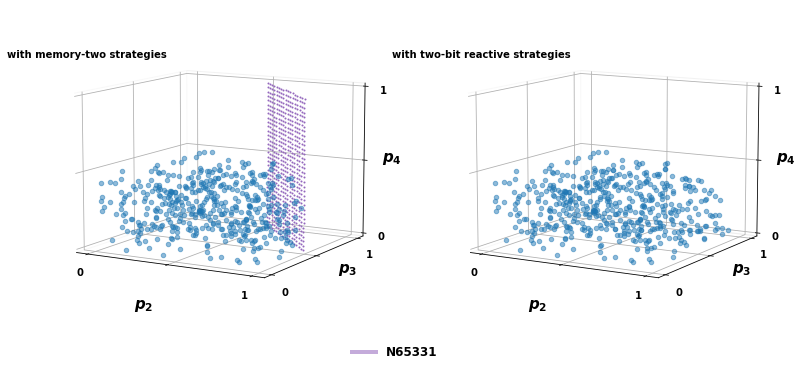

In [258]:
custom_lines = [Line2D([0], [0], color='tab:purple', lw=4, alpha=.55)]

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("with memory-two strategies", fontweight='bold', x=.1, y=.9, fontsize=10)

ax2.set_title("with two-bit reactive strategies", fontweight='bold', x=.1, y=.9, fontsize=10)


for point in data:
     ax1.scatter(point[0],
                 point[1],
                 point[2],
                 s=1,
                 color='tab:purple')
        
    
ax2.legend(custom_lines, ['N65331'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/six.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

### With different values of $b$

In [29]:
files = glob.glob("data/two_bit_against_memory_two_b_7/*csv")

In [31]:
dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df2 = pd.concat(dfs)

In [32]:
eq2, noneq2 = seperate_equilibria_and_non(df2)

In [34]:
eq2['ID'].nunique()

858

In [89]:
(exprN0).subs({b: 7, c:1})

7*p_4 - 6

In [90]:
(exprN13107).subs({b: 7, c:1}).factor()

(7*p_2 + 7*p_3 - 13)/2

In [64]:
groups = noneq2[noneq2['condition A'] == False].groupby('ID')

sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [67]:
[s for s in sets if ('N0' not in s) and ('N13107' not in s)]

[]

In [91]:
def N0(p):
    return 7 * p[3] - 6

def N13107(p):
    return (7 * p[1] + 7 * p[2] -  13) / 2

In [92]:
for i, row in eq2[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    assert A and B

In [93]:
ever_true = []

for i, row in noneq2[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    if (A and B):
        ever_true.append(row)

In [165]:
x = np.arange(0, 1 - 10 ** -5, 0.03)
y = np.arange(0, 1 - 10 ** -5, 0.03)
z = np.arange(0, 1 - 10 ** -5, 0.03)

xv, yv, zv = np.meshgrid(x, y, z)

Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 1))
Is13107, Js13107, Zs13107 = np.where(np.isclose(N13107((1, xv, yv, zv)), 0, atol=10 ** - 2))

In [166]:
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:red', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55)]

In [167]:
colors = ['tab:orange', 'tab:green']

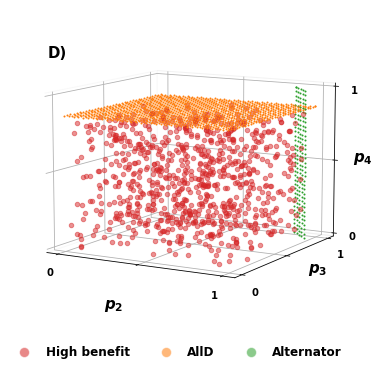

In [178]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]
    
for i, row in eq2[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:red', alpha=0.5)

ax1.set_zlim(0, 1);

    
for k, indices in enumerate([[Is0, Js0, Zs0],
                             [Is13107, Js13107, Zs13107]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax1.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax1.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
                color=colors[k])
        
for ax in axes:
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("D)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax1.legend(custom_lines, ['High benefit',
                          'AllD', 'Alternator'], bbox_to_anchor=(1, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("static/two_bit_reactive_numerical_results_benefit_high.pdf", bbox_inches='tight')